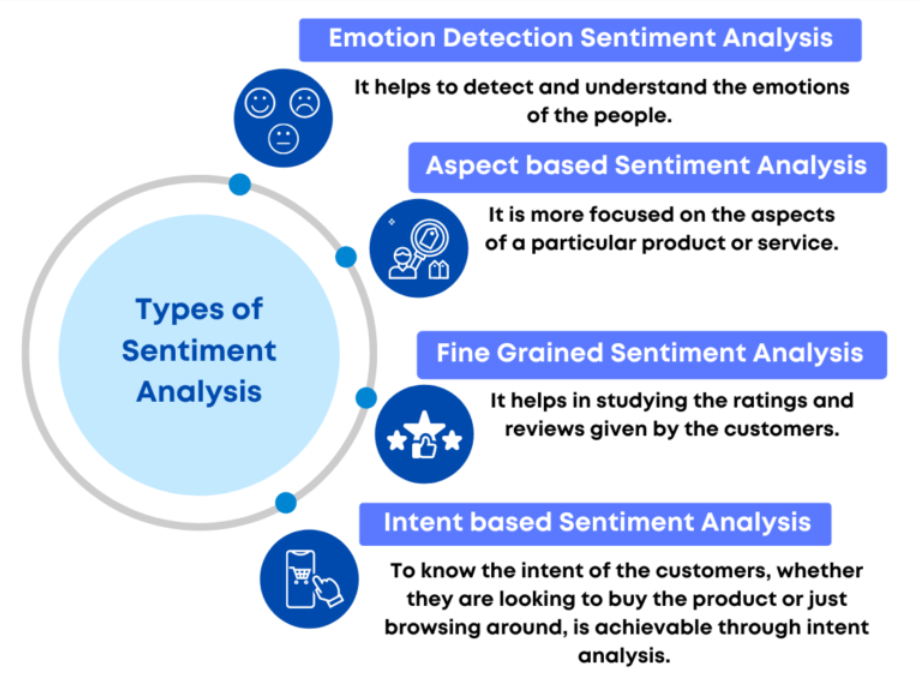

### these are some of the most common methodologies for sentiment analysis:

### Fine-grained Sentiment Analysis: breaks down polarity into smaller groups, usually highly positive to very negative, to provide a more specific level of polarity. This can be compared to a 5-star rating system in terms of opinion.
### Aspect-based Sentiment Analysis (ABSA): When it is related to a specific property or feature described in the text, it is most useful. ABSA is the process of discovering these traits or features and their sentiment. These features are referred to as “themes” at Thematic.
### Emotion detection: Rather than detecting positive and negative emotions, emotion detection detects specific emotions. Happiness, frustration, shock, anger, and grief are only a few examples.
### Intent-based: Intent-based analysis distinguishes between facts and opinions in a text. An online comment indicating dissatisfaction with changing a battery, for example, can motivate customer service to contact you to remedy the problem.

In [3]:
import nltk
#nltk.download('movie_reviews')

In [6]:
# Load and prepare the dataset
import nltk
from nltk.corpus import movie_reviews
import random
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

# Define feature extractor
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Training of Naive Bayes classifier
featurests = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featurests[100:], featurests[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(5)

0.74
Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.2 : 1.0
        contains(seagal) = True              neg : pos    =      8.2 : 1.0
         contains(mulan) = True              pos : neg    =      7.7 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.7 : 1.0
           contains(era) = True              pos : neg    =      6.2 : 1.0


In [7]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import email
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Jaiswal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     Jaiswal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#Loading File
df = pd.read_csv("C:/BITsPilaniMTECH2123/Sem3/NLP/NLP_All_Practice/emails.csv",nrows=5000)
df.tail()

file  \
4995  arnold-j/deleted_items/135.   
4996  arnold-j/deleted_items/136.   
4997  arnold-j/deleted_items/137.   
4998  arnold-j/deleted_items/138.   
4999  arnold-j/deleted_items/139.   

                                                message  
4995  Message-ID: <1618629.1075852693101.JavaMail.ev...  
4996  Message-ID: <25218462.1075852693367.JavaMail.e...  
4997  Message-ID: <20671206.1075852693390.JavaMail.e...  
4998  Message-ID: <31930685.1075852693414.JavaMail.e...  
4999  Message-ID: <22994957.1075852693440.JavaMail.e...

In [9]:
# create list of email objects
emails = list(map(email.parser.Parser().parsestr,df['message']))

# extract headings such as subject, from, to etc..
headings  = emails[0].keys()

# Goes through each email and grabs info for each key
# doc['From'] grabs who sent email in all emails
for key in headings:
    df[key] = [doc[key] for doc in emails]
    
df.tail()

file  \
4995  arnold-j/deleted_items/135.   
4996  arnold-j/deleted_items/136.   
4997  arnold-j/deleted_items/137.   
4998  arnold-j/deleted_items/138.   
4999  arnold-j/deleted_items/139.   

                                                message  \
4995  Message-ID: <1618629.1075852693101.JavaMail.ev...   
4996  Message-ID: <25218462.1075852693367.JavaMail.e...   
4997  Message-ID: <20671206.1075852693390.JavaMail.e...   
4998  Message-ID: <31930685.1075852693414.JavaMail.e...   
4999  Message-ID: <22994957.1075852693440.JavaMail.e...   

                                         Message-ID  \
4995   <1618629.1075852693101.JavaMail.evans@thyme>   
4996  <25218462.1075852693367.JavaMail.evans@thyme>   
4997  <20671206.1075852693390.JavaMail.evans@thyme>   
4998  <31930685.1075852693414.JavaMail.evans@thyme>   
4999  <22994957.1075852693440.JavaMail.evans@thyme>   

                                      Date                        From  \
4995  Tue, 9 Oct 2001 14:50:14 -0700 (PDT)        m..schmidt@enron.com   
4996  Tue, 9 Oct 2001 10:46:00 -0700 (PDT)   caroline.abramo@enron.com   
4997  Tue, 9 Oct 2001 07:23:43 -0700 (PDT)  scott.tanner@truequote.com   
4998  Tue, 9 Oct 2001 05:01:58 -0700 (PDT)   jennifer.fraser@enron.com   
4999  Mon, 8 Oct 2001 20:39:13 -0700 (PDT)        no.address@enron.com   

                         To  \
4995                   None   
4996  john.arnold@enron.com   
4997  john.arnold@enron.com   
4998  john.arnold@enron.com   
4999                   None   

                                                Subject Mime-Version  \
4995                                     Enron Mentions          1.0   
4996                             RE: Back office issues          1.0   
4997                                                APB          1.0   
4998  RE: 25% ACROSS THE BOARD REDUCTION IN ENE HEAD...          1.0   
4999  Please Register to Attend the Enron Management...          1.0   

                            Content-Type Content-Transfer-Encoding  \
4995  text/plain; charset=ANSI_X3.4-1968          quoted-printable   
4996        text/plain; charset=us-ascii                      7bit   
4997        text/plain; charset=us-ascii                      7bit   
4998        text/plain; charset=us-ascii                      7bit   
4999        text/plain; charset=us-ascii                      7bit   

                                                 X-From  \
4995  Schmidt, Ann M. </O=ENRON/OU=NA/CN=RECIPIENTS/...   
4996  Abramo, Caroline </O=ENRON/OU=NA/CN=RECIPIENTS...   
4997    Scott Tanner <scott.tanner@truequote.com>@ENRON   
4998  Fraser, Jennifer </O=ENRON/OU=NA/CN=RECIPIENTS...   
4999               Ken Lay- Chairman of the Board@ENRON   

                                                   X-To X-cc X-bcc  \
4995                                                                 
4996  Arnold, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...              
4997  john.arnold@enron.com; <??Sjohn.arnold@enron.c...              
4998  Arnold, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...              
4999  VP's and Above- Enron Management Conference Li...              

                                               X-Folder  X-Origin  \
4995  \JARNOLD (Non-Privileged)\Arnold, John\Deleted...  Arnold-J   
4996  \JARNOLD (Non-Privileged)\Arnold, John\Deleted...  Arnold-J   
4997  \JARNOLD (Non-Privileged)\Arnold, John\Deleted...  Arnold-J   
4998  \JARNOLD (Non-Privileged)\Arnold, John\Deleted...  Arnold-J   
4999  \JARNOLD (Non-Privileged)\Arnold, John\Deleted...  Arnold-J   

                        X-FileName  
4995  JARNOLD (Non-Privileged).pst  
4996  JARNOLD (Non-Privileged).pst  
4997  JARNOLD (Non-Privileged).pst  
4998  JARNOLD (Non-Privileged).pst  
4999  JARNOLD (Non-Privileged).pst

In [10]:
##Useful functions
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

df['body'] = list(map(get_raw_text, emails))
df.head()
df['user'] = df['file'].map(lambda x: x.split('/')[0])

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()
df.dtypes

file                         object
message                      object
Message-ID                   object
Date                         object
From                         object
To                           object
Subject                      object
Mime-Version                 object
Content-Type                 object
Content-Transfer-Encoding    object
X-From                       object
X-To                         object
X-cc                         object
X-bcc                        object
X-Folder                     object
X-Origin                     object
X-FileName                   object
body                         object
user                         object
dtype: object

In [12]:
def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


df['Subject_new'] = df['Subject'].apply(clean_column)
df['body_new'] = df['body'].apply(clean_column)

In [15]:
df['Subject_new'].tail(5)

4995                                       enron mentions
4996                                   back office issues
4997                                                  apb
4998          across the board reduction in ene headcount
4999    please register to attend the enron management...
Name: Subject_new, dtype: object

In [16]:
#Shape of dataframe
print(" Shape of training dataframe: ", df['body_new'].shape)

 Shape of training dataframe:  (5000,)


In [17]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (5000, 21)


In [18]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
                   column name  Total missing  Percent missing
0                          To             78           0.0156
1                        file              0           0.0000
2                        X-To              0           0.0000
3                 Subject_new              0           0.0000
4                        user              0           0.0000
5                        body              0           0.0000
6                  X-FileName              0           0.0000
7                    X-Origin              0           0.0000
8                    X-Folder              0           0.0000
9                       X-bcc              0           0.0000
10                       X-cc              0           0.0000
11                     X-From              0           0.0000
12                    message              0           0.0000
13  Content-Transfer-Encoding              0           0.0000
14               Content-Type            

## vaderSentiment

In [21]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [22]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [23]:
#testing the function
email  = "I would love to watch the magic show again"
email2 = "What the hell they have made. Pathetic!"
email3 = " I do not know what to do"  
print (sentiment_analyzer_score(email))
print (sentiment_analyzer_score(email2))
print (sentiment_analyzer_score(email3))

I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
None
What the hell they have made. Pathetic!- {'neg': 0.632, 'neu': 0.368, 'pos': 0.0, 'compound': -0.8622}
None
 I do not know what to do--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [24]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['body_new'].apply(tokenizer.tokenize)
words_descriptions.head()

0                            [here, is, our, forecast]
1    [traveling, to, have, a, business, meeting, ta...
2                      [test, successful, way, to, go]
3    [randy, can, you, send, me, a, schedule, of, t...
4                      [lets, shoot, for, tuesday, at]
Name: body_new, dtype: object

In [25]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

802809 words total, with a vocabulary size of 26084


In [26]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('the', 33837),
 ('to', 26564),
 ('and', 14703),
 ('of', 13090),
 ('a', 12838),
 ('you', 10333),
 ('in', 9920),
 ('for', 9434),
 ('on', 9317),
 ('i', 8589),
 ('is', 8368),
 ('this', 5955),
 ('that', 5599),
 ('be', 5384),
 ('from', 5143),
 ('with', 4857),
 ('have', 4816),
 ('will', 4748),
 ('pm', 4666),
 ('are', 4637),
 ('we', 4433),
 ('at', 4376),
 ('am', 4347),
 ('as', 4230),
 ('your', 4204),
 ('it', 4088),
 ('subject', 3815),
 ('if', 3785),
 ('by', 3779),
 ('or', 3620),
 ('phillip', 3239),
 ('cc', 3130),
 ('not', 3108),
 ('john', 3059),
 ('please', 2874),
 ('email', 2597),
 ('would', 2538),
 ('gas', 2399),
 ('can', 2336),
 ('me', 2250),
 ('enron', 2228),
 ('an', 2055),
 ('any', 2009),
 ('all', 2000),
 ('but', 1916),
 ('was', 1902),
 ('do', 1730),
 ('has', 1720),
 ('get', 1657),
 ('what', 1620),
 ('my', 1583),
 ('our', 1568),
 ('about', 1516),
 ('up', 1506),
 ('k', 1496),
 ('out', 1492),
 ('more', 1471),
 ('they', 1469),
 ('new', 1414),
 ('its', 1409),
 ('time', 1397),
 ('so', 1373),

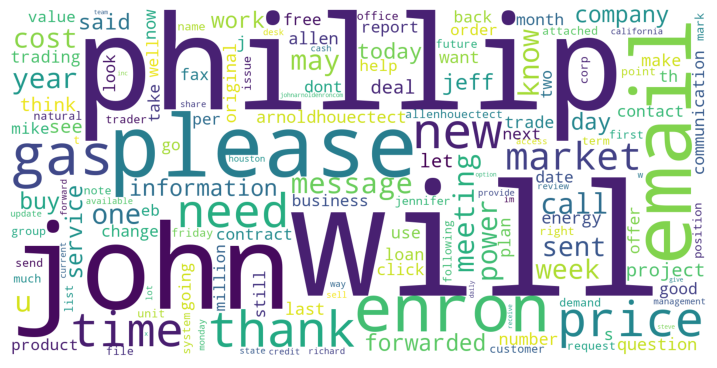

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm']

for i in to_add:
    stopwords.add(i)

#Visualise Email Subject

wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(df['body_new'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
df['scores'] = df['body_new'].apply(lambda review: analyser.polarity_scores(review))
df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                      Message-ID                       Date  \
0  <18782981.1075855378110.JavaMail.evans@thyme>  2001-05-14 16:39:00-07:00   
1  <15464986.1075855378456.JavaMail.evans@thyme>  2001-05-04 13:51:00-07:00   
2  <24216240.1075855687451.JavaMail.evans@thyme>  2000-10-18 03:00:00-07:00   
3  <13505866.1075863688222.JavaMail.evans@thyme>  2000-10-23 06:13:00-07:00   
4  <30922949.1075863688243.JavaMail.evans@thyme>  2000-08-31 05:07:00-07:00   

                      From                       To    Subject Mime-Version  \
0  phillip.allen@enron.com     tim.belden@enron.com                     1.0   
1  phillip.allen@enron.com  john.lavorato@enron.com        Re:          1.0   
2  phillip.allen@enron.com   leah.arsdall@enron.com   Re: test          1.0   
3  phillip.allen@enron.com    randall.gay@enron.com                     1.0   
4  phillip.allen@enron.com     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding  ... X-bcc  \
0  text/plain; charset=us-ascii                      7bit  ...         
1  text/plain; charset=us-ascii                      7bit  ...         
2  text/plain; charset=us-ascii                      7bit  ...         
3  text/plain; charset=us-ascii                      7bit  ...         
4  text/plain; charset=us-ascii                      7bit  ...         

                                            X-Folder X-Origin  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
3    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
4    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   

                    X-FileName  \
0  pallen (Non-Privileged).pst   
1  pallen (Non-Privileged).pst   
2                   pallen.nsf   
3                   pallen.nsf   
4                   pallen.nsf   

                                                body     user Subject_new  \
0                          Here is our forecast\n\n   allen-p               
1  Traveling to have a business meeting takes the...  allen-p               
2                     test successful.  way to go!!!  allen-p        test   
3  Randy,\n\n Can you send me a schedule of the s...  allen-p               
4                Let's shoot for Tuesday at 11:45.    allen-p       hello   

                                            body_new description_lengths  \
0                               here is our forecast                   4   
1  traveling to have a business meeting takes the...                 139   
2                         test successful  way to go                   5   
3  randy   can you send me a schedule of the sala...                  34   
4                          lets shoot for tuesday at                   5   

                                              scores  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...  
2  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...  

[5 rows x 23 columns]

In [29]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                      Message-ID                       Date  \
0  <18782981.1075855378110.JavaMail.evans@thyme>  2001-05-14 16:39:00-07:00   
1  <15464986.1075855378456.JavaMail.evans@thyme>  2001-05-04 13:51:00-07:00   
2  <24216240.1075855687451.JavaMail.evans@thyme>  2000-10-18 03:00:00-07:00   
3  <13505866.1075863688222.JavaMail.evans@thyme>  2000-10-23 06:13:00-07:00   
4  <30922949.1075863688243.JavaMail.evans@thyme>  2000-08-31 05:07:00-07:00   

                      From                       To    Subject Mime-Version  \
0  phillip.allen@enron.com     tim.belden@enron.com                     1.0   
1  phillip.allen@enron.com  john.lavorato@enron.com        Re:          1.0   
2  phillip.allen@enron.com   leah.arsdall@enron.com   Re: test          1.0   
3  phillip.allen@enron.com    randall.gay@enron.com                     1.0   
4  phillip.allen@enron.com     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding  ...  \
0  text/plain; charset=us-ascii                      7bit  ...   
1  text/plain; charset=us-ascii                      7bit  ...   
2  text/plain; charset=us-ascii                      7bit  ...   
3  text/plain; charset=us-ascii                      7bit  ...   
4  text/plain; charset=us-ascii                      7bit  ...   

                                            X-Folder X-Origin  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
3    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
4    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   

                    X-FileName  \
0  pallen (Non-Privileged).pst   
1  pallen (Non-Privileged).pst   
2                   pallen.nsf   
3                   pallen.nsf   
4                   pallen.nsf   

                                                body     user Subject_new  \
0                          Here is our forecast\n\n   allen-p               
1  Traveling to have a business meeting takes the...  allen-p               
2                     test successful.  way to go!!!  allen-p        test   
3  Randy,\n\n Can you send me a schedule of the s...  allen-p               
4                Let's shoot for Tuesday at 11:45.    allen-p       hello   

                                            body_new description_lengths  \
0                               here is our forecast                   4   
1  traveling to have a business meeting takes the...                 139   
2                         test successful  way to go                   5   
3  randy   can you send me a schedule of the sala...                  34   
4                          lets shoot for tuesday at                   5   

                                              scores compound  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000  
1  {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...   0.9313  
2  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...   0.5859  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000  
4  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...  -0.3400  

[5 rows x 24 columns]

In [30]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)


df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                      Message-ID                       Date  \
0  <18782981.1075855378110.JavaMail.evans@thyme>  2001-05-14 16:39:00-07:00   
1  <15464986.1075855378456.JavaMail.evans@thyme>  2001-05-04 13:51:00-07:00   
2  <24216240.1075855687451.JavaMail.evans@thyme>  2000-10-18 03:00:00-07:00   
3  <13505866.1075863688222.JavaMail.evans@thyme>  2000-10-23 06:13:00-07:00   
4  <30922949.1075863688243.JavaMail.evans@thyme>  2000-08-31 05:07:00-07:00   

                      From                       To    Subject Mime-Version  \
0  phillip.allen@enron.com     tim.belden@enron.com                     1.0   
1  phillip.allen@enron.com  john.lavorato@enron.com        Re:          1.0   
2  phillip.allen@enron.com   leah.arsdall@enron.com   Re: test          1.0   
3  phillip.allen@enron.com    randall.gay@enron.com                     1.0   
4  phillip.allen@enron.com     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding  ... X-Origin  \
0  text/plain; charset=us-ascii                      7bit  ...  Allen-P   
1  text/plain; charset=us-ascii                      7bit  ...  Allen-P   
2  text/plain; charset=us-ascii                      7bit  ...  Allen-P   
3  text/plain; charset=us-ascii                      7bit  ...  Allen-P   
4  text/plain; charset=us-ascii                      7bit  ...  Allen-P   

                    X-FileName  \
0  pallen (Non-Privileged).pst   
1  pallen (Non-Privileged).pst   
2                   pallen.nsf   
3                   pallen.nsf   
4                   pallen.nsf   

                                                body     user Subject_new  \
0                          Here is our forecast\n\n   allen-p               
1  Traveling to have a business meeting takes the...  allen-p               
2                     test successful.  way to go!!!  allen-p        test   
3  Randy,\n\n Can you send me a schedule of the s...  allen-p               
4                Let's shoot for Tuesday at 11:45.    allen-p       hello   

                                            body_new description_lengths  \
0                               here is our forecast                   4   
1  traveling to have a business meeting takes the...                 139   
2                         test successful  way to go                   5   
3  randy   can you send me a schedule of the sala...                  34   
4                          lets shoot for tuesday at                   5   

                                              scores compound Sentiment  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000   Neutral  
1  {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...   0.9313  Positive  
2  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...   0.5859  Positive  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000   Neutral  
4  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...  -0.3400  Negative  

[5 rows x 25 columns]

In [31]:
var1 = df.groupby('Sentiment').count()['body_new'].reset_index().sort_values(by='body_new',ascending=False)
fig = go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.body_new,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [32]:
df['temp_list'] = df['body_new'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')

In [33]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

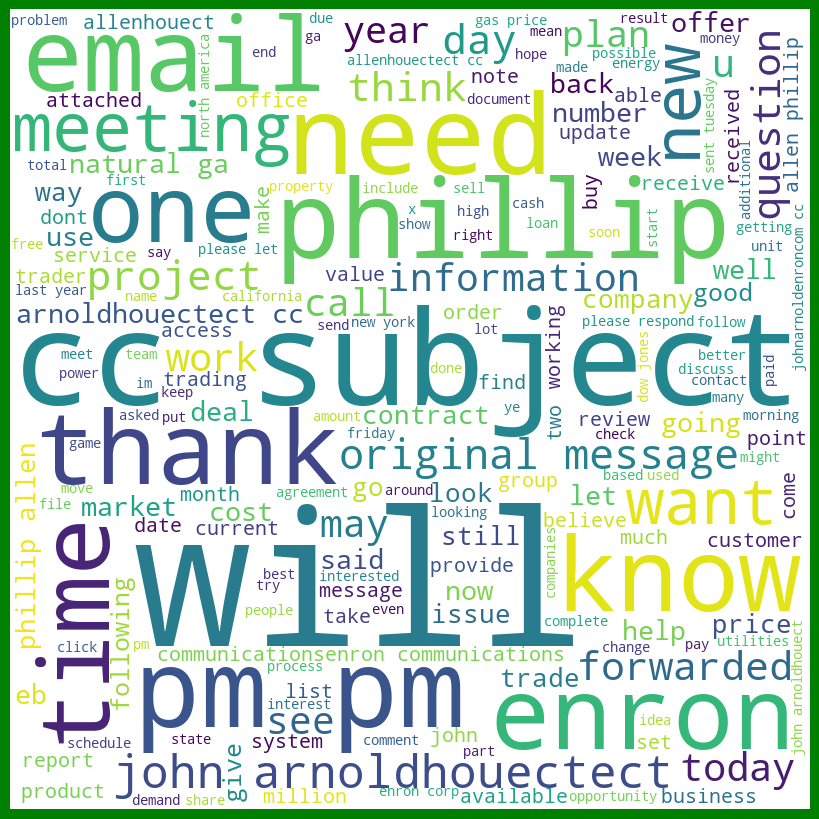

In [34]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.body_new: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

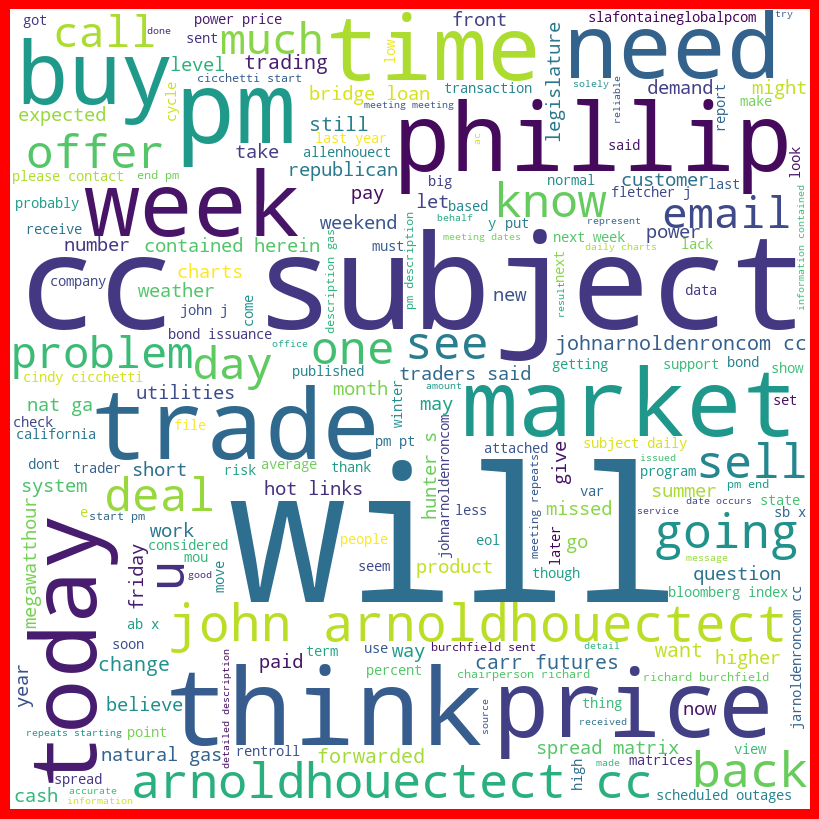

In [35]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Negative"] 
# iterate through the csv file 
for val in df_positive.body_new: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


## TextBlob

In [38]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [39]:
email = "I would love to meet you again"
TextBlob(email).sentiment 

Sentiment(polarity=0.5, subjectivity=0.6)

In [40]:
# Applying on dataset
df['TB_score']= df.body_new.apply(lambda x: TextBlob(x).sentiment)
df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                      Message-ID                       Date  \
0  <18782981.1075855378110.JavaMail.evans@thyme>  2001-05-14 16:39:00-07:00   
1  <15464986.1075855378456.JavaMail.evans@thyme>  2001-05-04 13:51:00-07:00   
2  <24216240.1075855687451.JavaMail.evans@thyme>  2000-10-18 03:00:00-07:00   
3  <13505866.1075863688222.JavaMail.evans@thyme>  2000-10-23 06:13:00-07:00   
4  <30922949.1075863688243.JavaMail.evans@thyme>  2000-08-31 05:07:00-07:00   

                      From                       To    Subject Mime-Version  \
0  phillip.allen@enron.com     tim.belden@enron.com                     1.0   
1  phillip.allen@enron.com  john.lavorato@enron.com        Re:          1.0   
2  phillip.allen@enron.com   leah.arsdall@enron.com   Re: test          1.0   
3  phillip.allen@enron.com    randall.gay@enron.com                     1.0   
4  phillip.allen@enron.com     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding  ...  \
0  text/plain; charset=us-ascii                      7bit  ...   
1  text/plain; charset=us-ascii                      7bit  ...   
2  text/plain; charset=us-ascii                      7bit  ...   
3  text/plain; charset=us-ascii                      7bit  ...   
4  text/plain; charset=us-ascii                      7bit  ...   

                                                body     user Subject_new  \
0                          Here is our forecast\n\n   allen-p               
1  Traveling to have a business meeting takes the...  allen-p               
2                     test successful.  way to go!!!  allen-p        test   
3  Randy,\n\n Can you send me a schedule of the s...  allen-p               
4                Let's shoot for Tuesday at 11:45.    allen-p       hello   

                                            body_new description_lengths  \
0                               here is our forecast                   4   
1  traveling to have a business meeting takes the...                 139   
2                         test successful  way to go                   5   
3  randy   can you send me a schedule of the sala...                  34   
4                          lets shoot for tuesday at                   5   

                                              scores compound Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000   Neutral   
1  {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...   0.9313  Positive   
2  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...   0.5859  Positive   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000   Neutral   
4  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...  -0.3400  Negative   

                                           temp_list  \
0                          [here, is, our, forecast]   
1  [traveling, to, have, a, business, meeting, ta...   
2                    [test, successful, way, to, go]   
3  [randy, can, you, send, me, a, schedule, of, t...   
4                    [lets, shoot, for, tuesday, at]   

                                   TB_score  
0                                (0.0, 0.0)  
1  (0.18181818181818182, 0.603030303030303)  
2                              (0.75, 0.95)  
3                                (0.0, 0.0)  
4                                (0.0, 0.0)  

[5 rows x 27 columns]

In [41]:
df['TB_sentiment'] = df['body_new'].apply(lambda x: TextBlob(x).sentiment[0])
df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                      Message-ID                       Date  \
0  <18782981.1075855378110.JavaMail.evans@thyme>  2001-05-14 16:39:00-07:00   
1  <15464986.1075855378456.JavaMail.evans@thyme>  2001-05-04 13:51:00-07:00   
2  <24216240.1075855687451.JavaMail.evans@thyme>  2000-10-18 03:00:00-07:00   
3  <13505866.1075863688222.JavaMail.evans@thyme>  2000-10-23 06:13:00-07:00   
4  <30922949.1075863688243.JavaMail.evans@thyme>  2000-08-31 05:07:00-07:00   

                      From                       To    Subject Mime-Version  \
0  phillip.allen@enron.com     tim.belden@enron.com                     1.0   
1  phillip.allen@enron.com  john.lavorato@enron.com        Re:          1.0   
2  phillip.allen@enron.com   leah.arsdall@enron.com   Re: test          1.0   
3  phillip.allen@enron.com    randall.gay@enron.com                     1.0   
4  phillip.allen@enron.com     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding  ...     user  \
0  text/plain; charset=us-ascii                      7bit  ...  allen-p   
1  text/plain; charset=us-ascii                      7bit  ...  allen-p   
2  text/plain; charset=us-ascii                      7bit  ...  allen-p   
3  text/plain; charset=us-ascii                      7bit  ...  allen-p   
4  text/plain; charset=us-ascii                      7bit  ...  allen-p   

  Subject_new                                           body_new  \
0                                           here is our forecast   
1              traveling to have a business meeting takes the...   
2        test                         test successful  way to go   
3              randy   can you send me a schedule of the sala...   
4       hello                          lets shoot for tuesday at   

  description_lengths                                             scores  \
0                   4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
1                 139  {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...   
2                   5  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...   
3                  34  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
4                   5  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...   

  compound Sentiment                                          temp_list  \
0   0.0000   Neutral                          [here, is, our, forecast]   
1   0.9313  Positive  [traveling, to, have, a, business, meeting, ta...   
2   0.5859  Positive                    [test, successful, way, to, go]   
3   0.0000   Neutral  [randy, can, you, send, me, a, schedule, of, t...   
4  -0.3400  Negative                    [lets, shoot, for, tuesday, at]   

                                   TB_score TB_sentiment  
0                                (0.0, 0.0)     0.000000  
1  (0.18181818181818182, 0.603030303030303)     0.181818  
2                              (0.75, 0.95)     0.750000  
3                                (0.0, 0.0)     0.000000  
4                                (0.0, 0.0)     0.000000  

[5 rows x 28 columns]

## NRCLex

In [44]:
from nrclex import NRCLex
email = NRCLex('Good work to the team')
#Return affect dictionary
print(email.affect_dict)
#Return raw emotional counts
print("\n",email.raw_emotion_scores)
#Return highest emotions
print("\n", email.top_emotions)
#Return affect frequencies
print("\n",email.affect_frequencies)

{'team': ['trust']}

 {'trust': 1}

 [('trust', 1.0)]

 {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 1.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}


In [45]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['body_new'].apply(emotion)
df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                      Message-ID                       Date  \
0  <18782981.1075855378110.JavaMail.evans@thyme>  2001-05-14 16:39:00-07:00   
1  <15464986.1075855378456.JavaMail.evans@thyme>  2001-05-04 13:51:00-07:00   
2  <24216240.1075855687451.JavaMail.evans@thyme>  2000-10-18 03:00:00-07:00   
3  <13505866.1075863688222.JavaMail.evans@thyme>  2000-10-23 06:13:00-07:00   
4  <30922949.1075863688243.JavaMail.evans@thyme>  2000-08-31 05:07:00-07:00   

                      From                       To    Subject Mime-Version  \
0  phillip.allen@enron.com     tim.belden@enron.com                     1.0   
1  phillip.allen@enron.com  john.lavorato@enron.com        Re:          1.0   
2  phillip.allen@enron.com   leah.arsdall@enron.com   Re: test          1.0   
3  phillip.allen@enron.com    randall.gay@enron.com                     1.0   
4  phillip.allen@enron.com     greg.piper@enron.com  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding  ... Subject_new  \
0  text/plain; charset=us-ascii                      7bit  ...               
1  text/plain; charset=us-ascii                      7bit  ...               
2  text/plain; charset=us-ascii                      7bit  ...        test   
3  text/plain; charset=us-ascii                      7bit  ...               
4  text/plain; charset=us-ascii                      7bit  ...       hello   

                                            body_new description_lengths  \
0                               here is our forecast                   4   
1  traveling to have a business meeting takes the...                 139   
2                         test successful  way to go                   5   
3  randy   can you send me a schedule of the sala...                  34   
4                          lets shoot for tuesday at                   5   

                                              scores compound Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000   Neutral   
1  {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...   0.9313  Positive   
2  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...   0.5859  Positive   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000   Neutral   
4  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...  -0.3400  Negative   

                                           temp_list  \
0                          [here, is, our, forecast]   
1  [traveling, to, have, a, business, meeting, ta...   
2                    [test, successful, way, to, go]   
3  [randy, can, you, send, me, a, schedule, of, t...   
4                    [lets, shoot, for, tuesday, at]   

                                   TB_score TB_sentiment   Emotion  
0                                (0.0, 0.0)     0.000000     trust  
1  (0.18181818181818182, 0.603030303030303)     0.181818  positive  
2                              (0.75, 0.95)     0.750000     trust  
3                                (0.0, 0.0)     0.000000     trust  
4                                (0.0, 0.0)     0.000000      fear  

[5 rows x 29 columns]

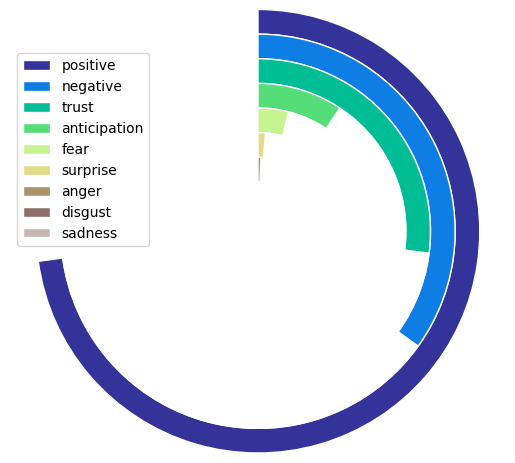

In [46]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

## transformers

In [50]:
# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import pipeline

In [57]:
article=df['body_new'][100]
print(article)
nlp_sentence_classif = pipeline('sentiment-analysis')
nlp_sentence_classif(','.join(article))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


i tried the new address but i dont have access  also what do i need to  enter under domain


[{'label': 'NEGATIVE', 'score': 0.8442734479904175}]

In [ ]:
#Links:
#https://www.kaggle.com/code/hardikjain10/email-sentiment-analysis/notebook
#https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/
#https://www.analyticsvidhya.com/blog/2022/04/a-comprehensive-overview-of-sentiment-analysis/
#https://www.kaggle.com/code/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp/notebook
#https://www.analyticsvidhya.com/blog/2021/12/different-methods-for-calculating-sentiment-score-of-text/